In [1]:
# Exercise

# First plot data points on a scatter plot chart
# to see if linear regression model can be applied. If yes, then build a model that can answer
# following questions,

# 1) Predict price of a mercedez benz that is 4 yr old with mileage 45000

# 2) Predict price of a BMW X5 that is 7 yr old with mileage 86000

# 3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [4]:
dummies = pd.get_dummies(df["Car Model"]).astype(int)
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [5]:
merged = pd.concat([df,dummies],axis='columns')
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [6]:
final = merged.drop(['Car Model'], axis='columns')
final = final.drop(['Audi A5'], axis='columns')
final

,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0
5,59000,29400,5,0,0
6,52000,32000,5,0,0
7,72000,19300,6,0,0
8,91000,12000,8,0,0
9,67000,22000,6,0,1


In [7]:
X = final.drop('Sell Price($)', axis='columns')
X

,Mileage,Age(yrs),BMW X5,Mercedez Benz C class
0,69000,6,1,0
1,35000,3,1,0
2,57000,5,1,0
3,22500,2,1,0
4,46000,4,1,0
5,59000,5,0,0
6,52000,5,0,0
7,72000,6,0,0
8,91000,8,0,0
9,67000,6,0,1


In [8]:
y = final["Sell Price($)"]

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

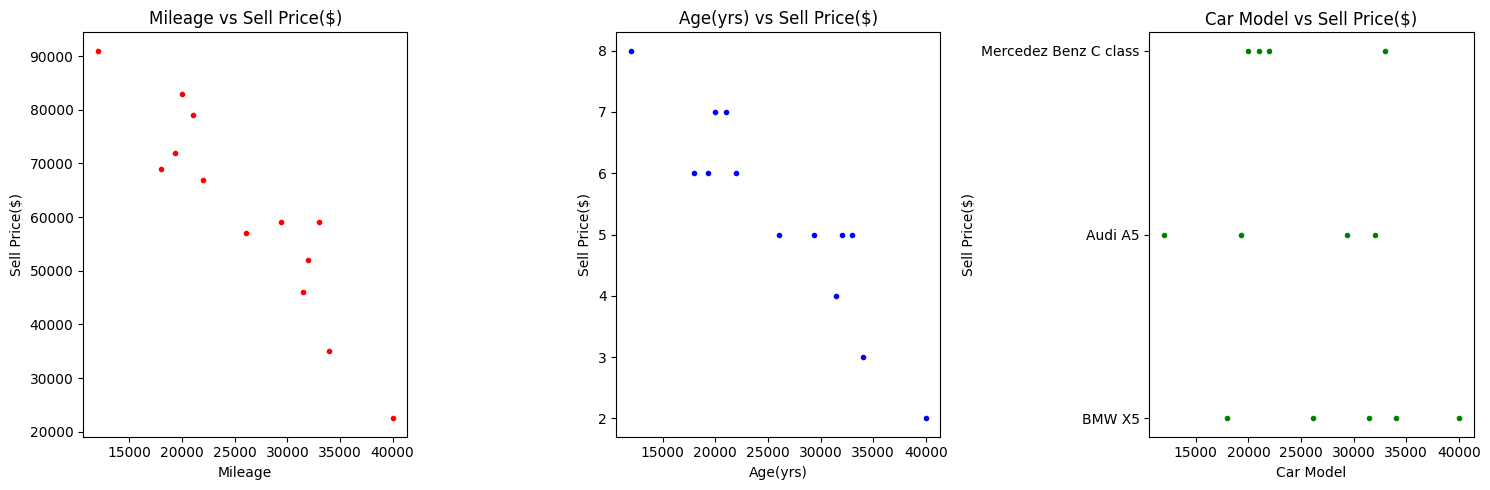

In [10]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#First Plot
axes[0].set_xlabel('Mileage')
axes[0].set_ylabel('Sell Price($)')
axes[0].scatter(df['Sell Price($)'],df['Mileage'],color='red',marker='.')
axes[0].set_title('Mileage vs Sell Price($)')

#Second Plot
axes[1].set_xlabel('Age(yrs)')
axes[1].set_ylabel('Sell Price($)')
axes[1].scatter(df['Sell Price($)'],df['Age(yrs)'],color='blue',marker='.')
axes[1].set_title('Age(yrs) vs Sell Price($)')

#Third Plot
axes[2].set_xlabel('Car Model')
axes[2].set_ylabel('Sell Price($)')
axes[2].scatter(df['Sell Price($)'],df['Car Model'],color='Green',marker='.')
axes[2].set_title('Car Model vs Sell Price($)')

plt.tight_layout()
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [12]:
model.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
model.predict(X)

array([18705.2723644 , 35286.78445645, 24479.19112468, 41245.76426391,
       29882.98779056, 28023.6135243 , 30614.46818502, 21879.57266964,
       12182.34562104, 26183.72387884, 18929.31674102, 20409.80511857,
       30477.15426156])

In [14]:
# 1) Predict price of a mercedez benz that is 4 yr old with mileage 45000

benz = model.predict([[45000, 4, 0, 1]])[0]

/Users/ooga/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [15]:
# 2) Predict price of a BMW X5 that is 7 yr old with mileage 86000

x5 = model.predict([[86000, 7, 1, 0]])[0]

/Users/ooga/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:
score = model.score(X,y)

In [17]:
print(f"1) Predicted price of a mercedez benz that is 4 yr old with mileage 45000: {benz}")
print(f"2) Predicted price of a BMW X5 that is 7 yr old with mileage 86000: {x5}")
print(f"3) Score (accuracy) of the model: {score*100:.2f} %")

1) Predicted price of a mercedez benz that is 4 yr old with mileage 45000: 36991.31721061283
2) Predicted price of a BMW X5 that is 7 yr old with mileage 86000: 11080.743132190655
3) Score (accuracy) of the model: 94.17 %
